In [1]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

import sys
sys.path.append("..") 

from blackjack.game import BlackJackEnv

warnings.filterwarnings("ignore")

In [2]:
gym.register('blackjack-v1', BlackJackEnv)

In [3]:
env = gym.make('blackjack-v1')

In [8]:
state

({'Dealer': 11, 'PlayerCount': 9, 'PlayerAce': 0}, {})

In [11]:
env.step(1)

({'Dealer': 4, 'PlayerCount': 16, 'PlayerAce': 0}, 0, False, False, {})

In [14]:
# td learning loop
STATES = (32, 14, 2, 2)

ACTIONS = [0,1]


Q = np.zeros(STATES)
epsilon = 0.1

alpha = 0.01

epsilon_decay = 1

for i in tqdm(range(10_000_000)):
    done = False
    state, _ = env.reset()
    finished = False
    while not finished:
        action = np.argmax(Q[state['PlayerCount'], state['Dealer'], state['PlayerAce'], :])

        next_state, reward, done,_, _ = env.step(action)
        Q[state['PlayerCount'], state['Dealer'], state['PlayerAce'], action] *= (1-alpha)
        if done:
            Q[state['PlayerCount'], state['Dealer'], state['PlayerAce'], action] += alpha * (reward)
        else:
            Q[state['PlayerCount'], state['Dealer'], state['PlayerAce'], action] += alpha * (reward + np.max(Q[next_state['PlayerCount'], next_state['Dealer'], next_state['PlayerAce'], :])) 
        
        epsilon *= epsilon_decay

        state = next_state
        finished = done

  0%|          | 0/10000000 [00:00<?, ?it/s]

100%|██████████| 10000000/10000000 [04:48<00:00, 34700.27it/s]


In [15]:
with_aces = Q[:, :, 1, :]

no_aces = Q[:, :, 0, :]

In [16]:
Q_action = np.max(Q, axis=3)

In [17]:
Q_reward = np.mean(Q_action, axis=2)

In [18]:
Q_reward = np.mean(Q_reward, axis=1)

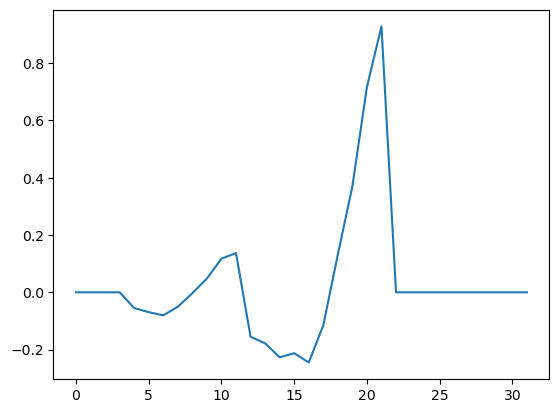

In [19]:
plt.plot(Q_reward)

In [20]:
with_aces_strat = np.argmax(with_aces, axis=2)

In [21]:
no_aces_strat = np.argmax(no_aces, axis=2)

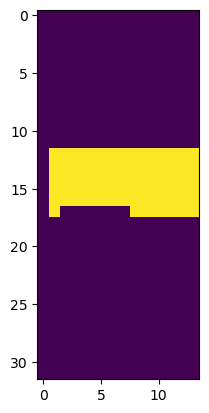

In [22]:
ax = plt.imshow(with_aces_strat)

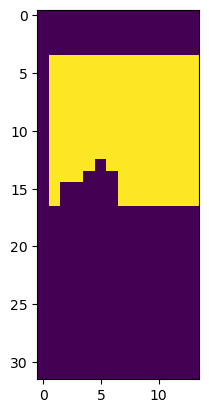

In [23]:
ax = plt.imshow(no_aces_strat)